<a href="https://colab.research.google.com/github/OnePassio/CE888/blob/master/Lab4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab4: 
Github: https://github.com/albanda/CE888/tree/master/lab4

#Load data 
file: bank-additional-full.csv

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_bank = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv',
                       sep=';',header=0)
df_bank.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#task
Use a classifier (anything, but ExtraTreesClassifier with 100 estimators is the easiest option) on the data with outcome/output variable "y"

-  *Convert to dummies using df_dummies = pd.get_dummies(df)*
-  *Columns "y_no" and "duration" must be deleted - use something like del df_copy["attribute"] for this*
-  *Plot histogram of the label y_yes*
-  *Get the values and run a classifier (with outcome y_yes)*
-  *Report the results of 10-Kfold stratified cross-validation*
-  *Get sample importances and a confusion matrix*

In [3]:
# convert to dummies
df_dummies=pd.get_dummies(df_bank)

# remove duration and y_no
df_dummies=df_dummies.drop(['y_no','duration'], axis=1)

#print test
df_dummies.head()



,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


#Plot histogram of the label y_yes

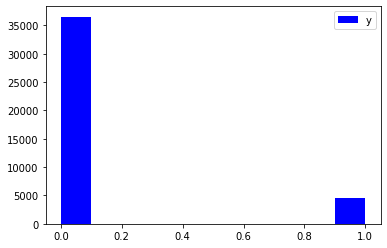

In [4]:
#plot y_yes
import matplotlib.pyplot as plt

plt.hist(df_dummies['y_yes'],color='b')
plt.legend("y_yes");

#df_dummies.hist(column='y_yes')


#Get the values and run a classifier (with outcome y_yes)

In [5]:
from sklearn.model_selection import train_test_split
#Get the values and run a classifier 
features= ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx']
X=df_dummies[features].copy()
y=df_dummies['y_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

X_train.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx
28710,45,1,999,1,-1.8,93.075
20552,31,5,999,0,1.4,93.444
15010,24,3,999,0,1.4,93.918
19478,29,1,999,0,1.4,93.444
36750,31,3,999,0,-2.9,92.963


In [6]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

clf = ExtraTreesClassifier(n_estimators=1000, max_depth=4)
clf.fit(X_train,y_train)
dummy_clf = DummyClassifier() # generates predictions by respecting the training set's class distribution
dummy_clf.fit(X_train,y_train)
scores = cross_val_score(clf, X_train, y_train, cv=10,scoring=make_scorer(accuracy_score))
dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring=make_scorer(accuracy_score))

#Report the results of 10-Kfold stratified cross-validation
print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f +/- %0.2f" % (dummy_scores.mean(), dummy_scores.std()))

ACC: 0.90 +/- 0.00
Dummy ACC: 0.80 +/- 0.01


In [0]:
#cross validation test
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf, X_train, y_train, cv=10,scoring=make_scorer(accuracy_score))
scores

Get sample importances

Feature ranking:
1. pdays (0.491799)
2. emp.var.rate (0.326927)
3. cons.price.idx (0.091768)
4. previous (0.056255)
5. age (0.026733)
6. campaign (0.006518)


(0, 0.8062256715700142)

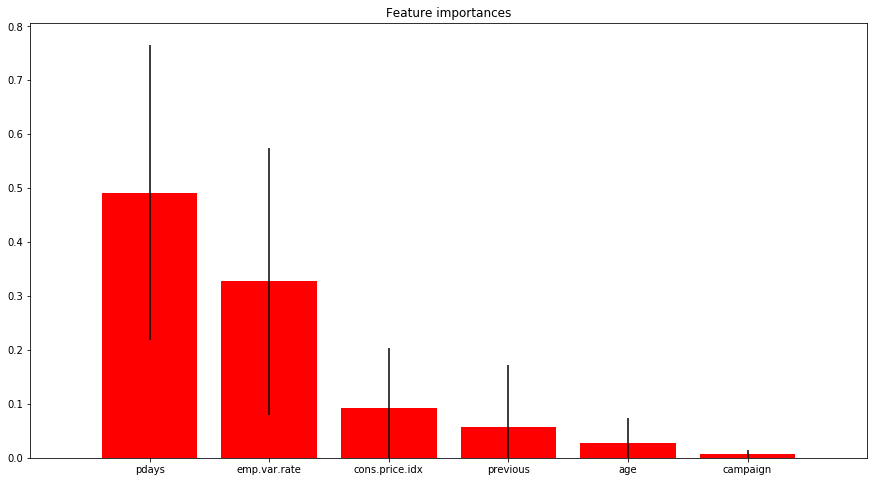

In [7]:
importances = clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
  print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))
# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(features)[indices])
plt.xlim([-1, X_train.shape[1]])
fig.set_size_inches(15, 8)
axes = plt.gca()
axes.set_ylim([0, None])

a confusion matrix

In [0]:

def plot_confusion_matrix2(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


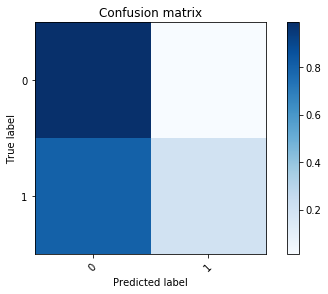

In [9]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import itertools
# Compute confusion matrix
y_pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix2(cnf_matrix, classes=range(len(set(y_test))), normalize = True,
                      title='Confusion matrix')
